Nama  : IHSAN DAROJATUL U'LA <br>
NIM   : 231352001<br>
Kelas : MALAM A

# import Dataset

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ihsandarojatulula","key":"90d939c74819bbd724a323ccc8ff33ab"}'}

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [5]:
!kaggle datasets download -d rajakali/diabetesknn

  0% 0.00/8.90k [00:00<?, ?B/s]
100% 8.90k/8.90k [00:00<00:00, 14.7MB/s]


In [6]:
!mkdir diabetesknn
!unzip diabetesknn.zip -d diabetesknn
!ls diabetesknn

Archive:  diabetesknn.zip
  inflating: diabetesknn/diabetes.csv  
diabetes.csv


# import library yang digunakan

In [176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import pickle

# Data Discovery

In [48]:
df = pd.read_csv('diabetesknn/diabetes.csv')

In [49]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               767 non-null    int64  
 1   Glucose                   767 non-null    int64  
 2   BloodPressure             767 non-null    int64  
 3   SkinThickness             767 non-null    int64  
 4   Insulin                   767 non-null    int64  
 5   BMI                       767 non-null    float64
 6   DiabetesPedigreeFunction  767 non-null    float64
 7   Age                       767 non-null    int64  
 8   Outcome                   767 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [51]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.848761,120.930900,69.104302,20.522816,79.903520,31.994654,0.472081,33.254237,0.349413
std,3.370207,31.977581,19.368410,15.958143,115.283105,7.889095,0.331496,11.762079,0.477096
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,32.000000,32.000000,0.374000,29.000000,0.000000
75%,6.000000,140.500000,80.000000,32.000000,127.500000,36.600000,0.626500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [52]:
df.shape

(767, 9)

# EDA (minimal 5)

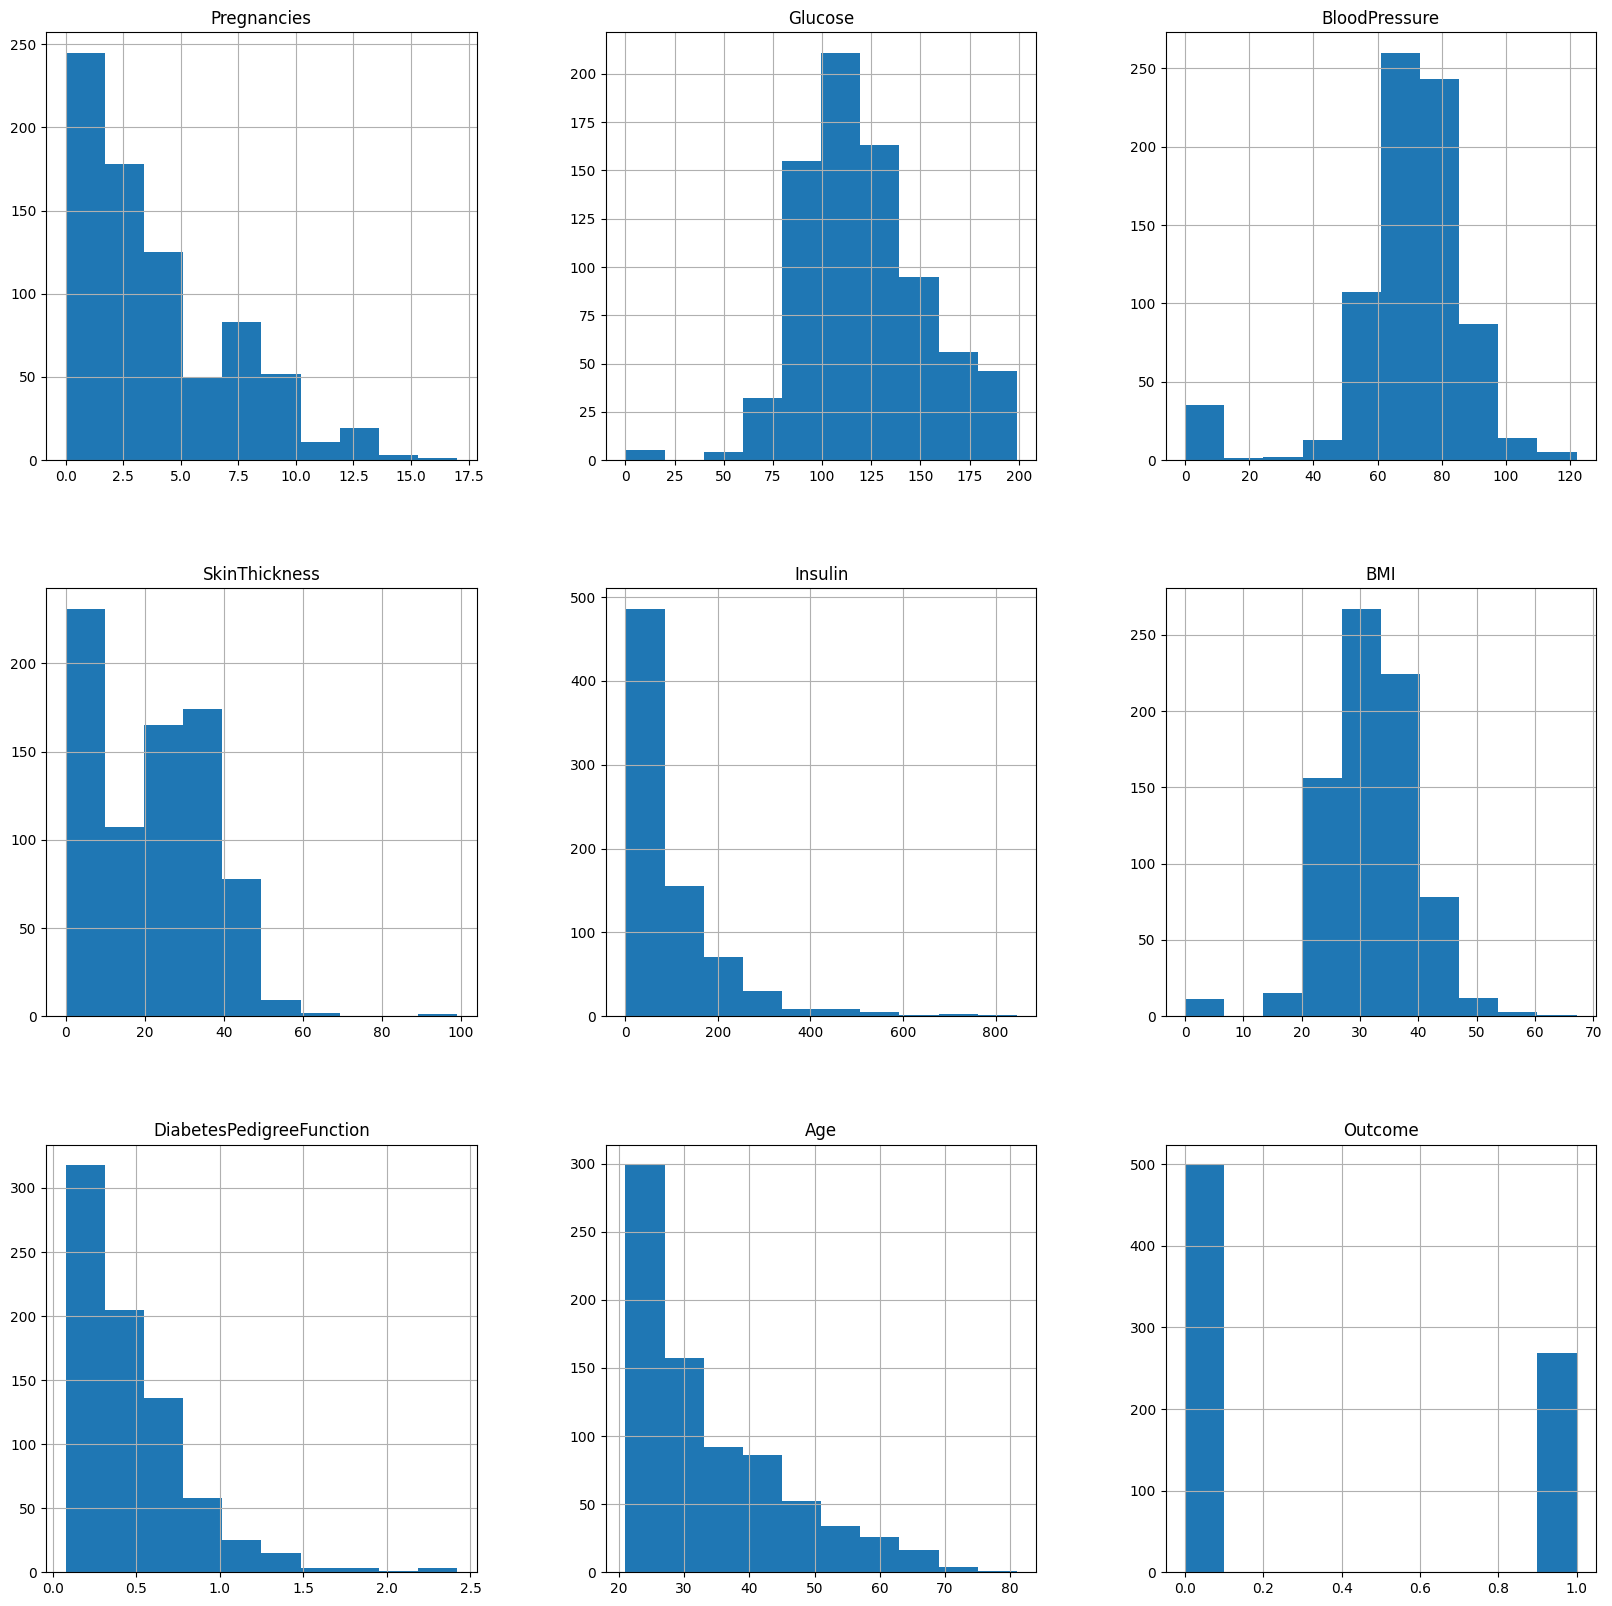

In [83]:
p = df.hist(figsize = (20,20))

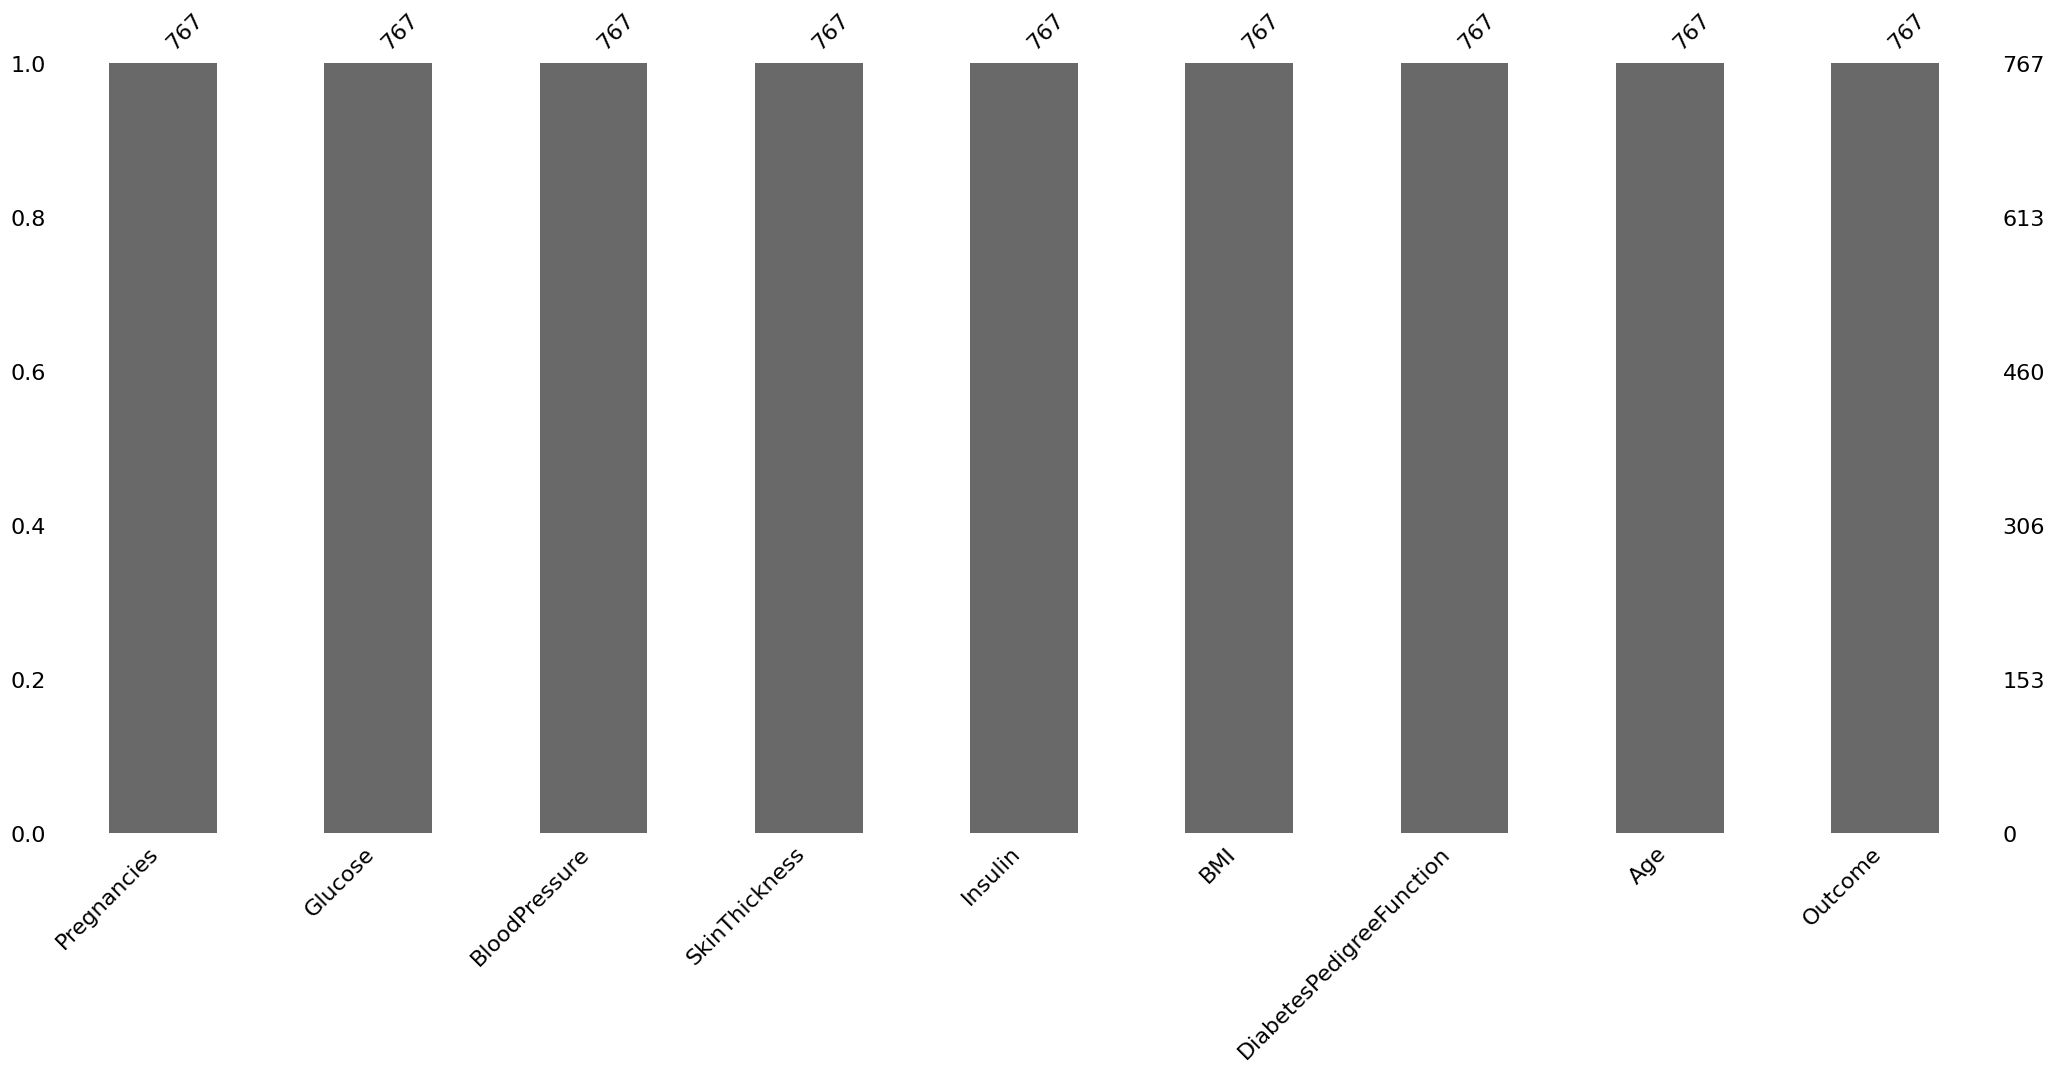

In [87]:
p=msno.bar(df)

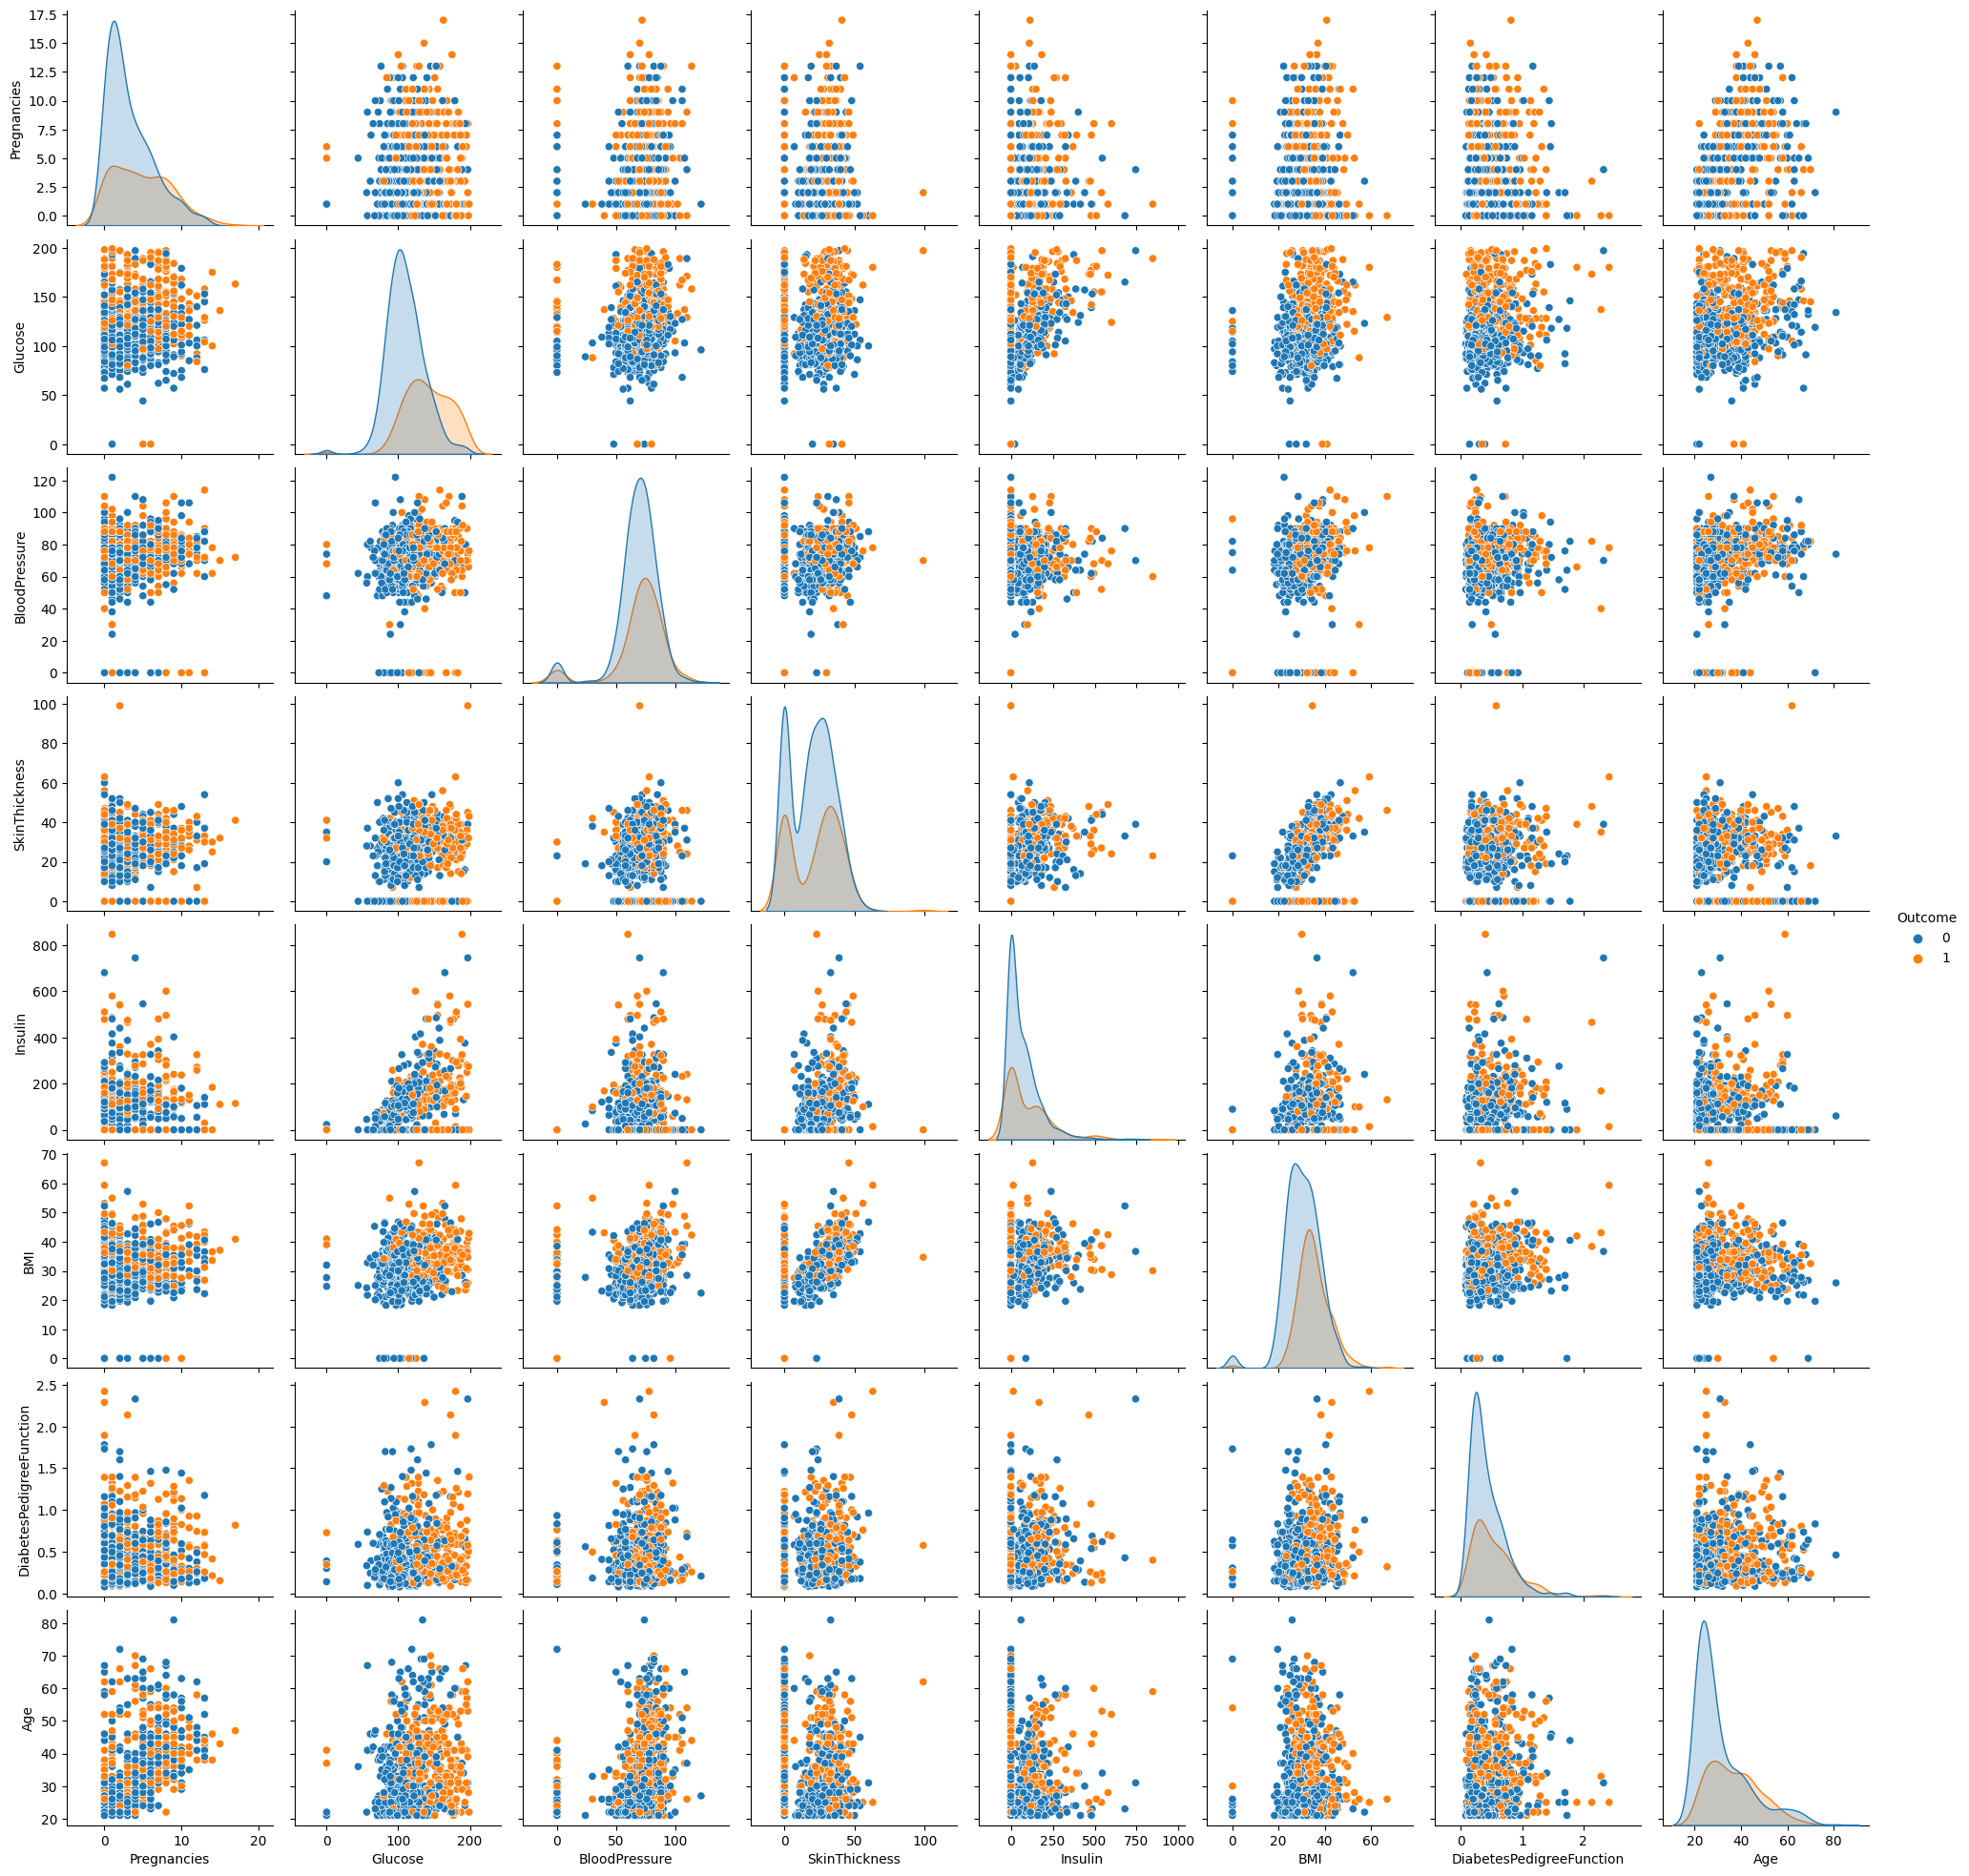

In [91]:
p=sns.pairplot(df, hue = 'Outcome')

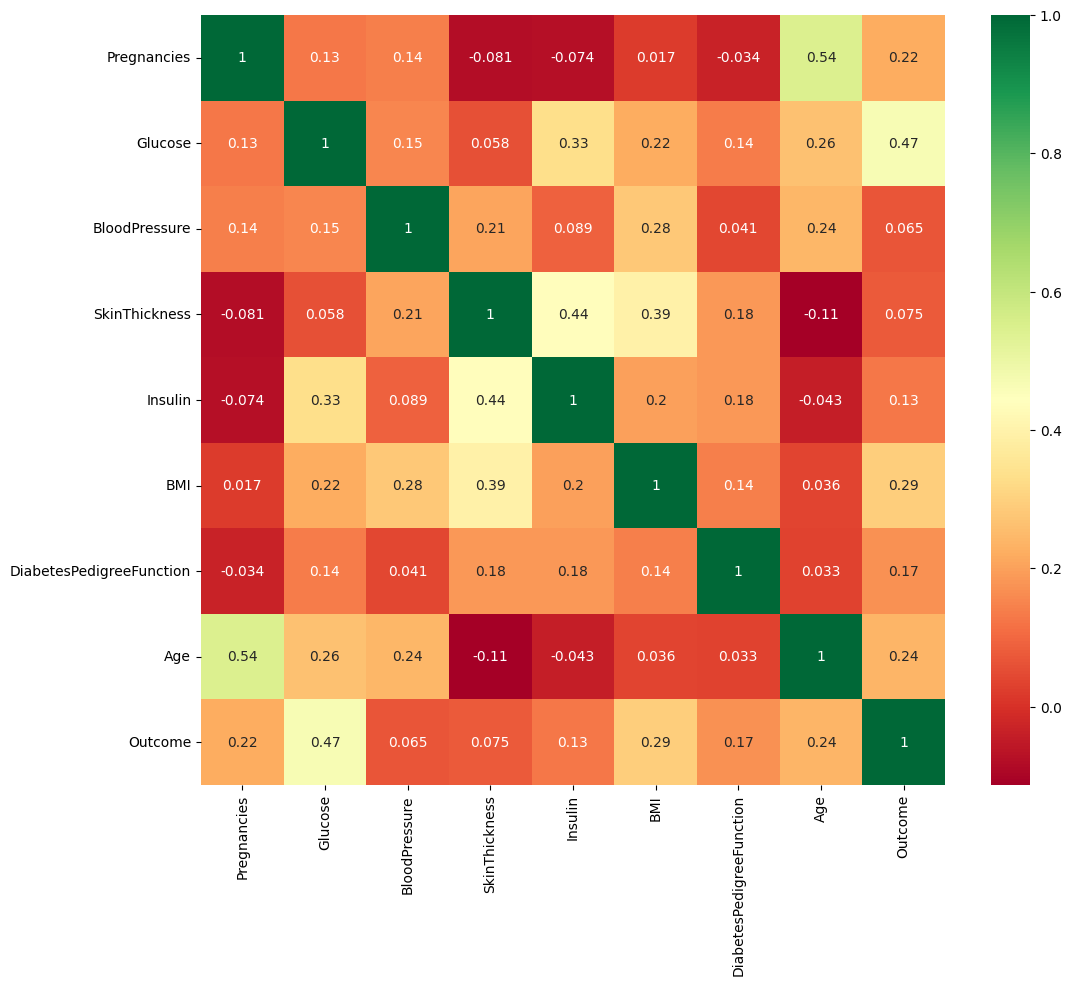

In [93]:
plt.figure(figsize=(12,10))
p=sns.heatmap(df.corr(), annot=True,cmap ='RdYlGn')

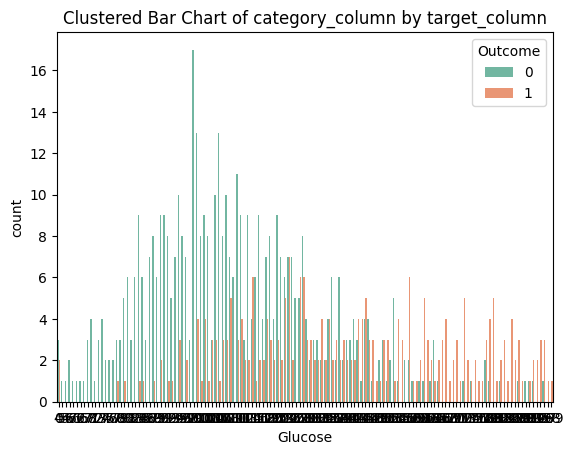

In [96]:
sns.countplot(x='Glucose', hue='Outcome', data=df, palette='Set2')
plt.title('Clustered Bar Chart of category_column by target_column')
plt.show()

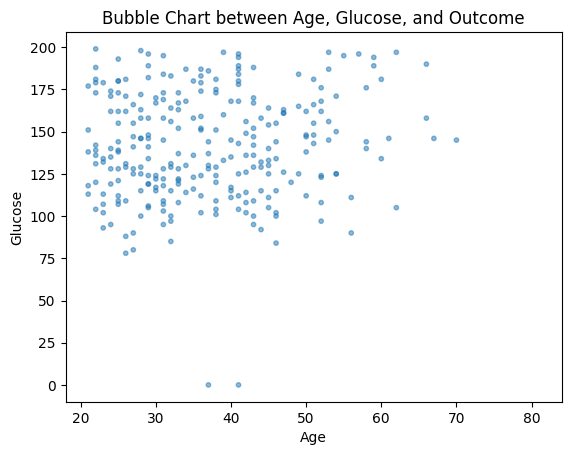

In [101]:
plt.scatter(df['Age'], df['Glucose'], s=df['Outcome']*10, alpha=0.5)
plt.title('Bubble Chart between Age, Glucose, and Outcome')
plt.xlabel('Age')
plt.ylabel('Glucose')
plt.show()

# Preprocessing

In [120]:
X = df.drop (columns='Outcome', axis=1)
Y = df['Outcome']

In [122]:
print(X)
print(Y)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
762            9       89             62              0        0  22.5   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [124]:
scaler = StandardScaler()
scaler.fit(X)
standarized_data = scaler.transform(X)

In [125]:
print(standarized_data)

[[ 0.63872696  0.8470548   0.14960376 ...  0.20362197  0.467638
   1.42463671]
 [-0.84582934 -1.124361   -0.16038116 ... -0.6842578  -0.36549383
  -0.19177802]
 [ 1.23254948  1.9422858  -0.26370947 ... -1.10282969  0.60347471
  -0.10670356]
 ...
 [-0.54891808  0.03345463  0.04627545 ...  0.60950986 -0.39869836
  -0.53207586]
 [ 0.3418157   0.00216231  0.14960376 ... -0.73499379 -0.68546474
  -0.27685248]
 [-0.84582934  0.15862388 -0.47036608 ... -0.24031791 -0.37153101
   1.16941333]]


In [127]:
X = standarized_data
Y = df['Outcome']

In [128]:
print(X)
print(Y)

[[ 0.63872696  0.8470548   0.14960376 ...  0.20362197  0.467638
   1.42463671]
 [-0.84582934 -1.124361   -0.16038116 ... -0.6842578  -0.36549383
  -0.19177802]
 [ 1.23254948  1.9422858  -0.26370947 ... -1.10282969  0.60347471
  -0.10670356]
 ...
 [-0.54891808  0.03345463  0.04627545 ...  0.60950986 -0.39869836
  -0.53207586]
 [ 0.3418157   0.00216231  0.14960376 ... -0.73499379 -0.68546474
  -0.27685248]
 [-0.84582934  0.15862388 -0.47036608 ... -0.24031791 -0.37153101
   1.16941333]]
0      1
1      0
2      1
3      0
4      1
      ..
762    0
763    0
764    0
765    0
766    1
Name: Outcome, Length: 767, dtype: int64


# modeling

In [134]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1/3, stratify=Y, random_state=42)

In [137]:
test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,Y_train)

    train_scores.append(knn.score(X_train,Y_train))
    test_scores.append(knn.score(X_test,Y_test))

In [138]:
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [139]:
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 78.90625 % and k = [11]


# Visualisasi hasil algoritma

In [144]:
knn = KNeighborsClassifier(11)

knn.fit(X_train,Y_train)
knn.score(X_test,Y_test)

0.7890625

In [151]:
Y_pred = knn.predict(X_test)
confusion_matrix(Y_test,Y_pred)
pd.crosstab(Y_test, Y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,150,17,167
1,37,52,89
All,187,69,256


Text(0.5, 23.52222222222222, 'Predicted label')

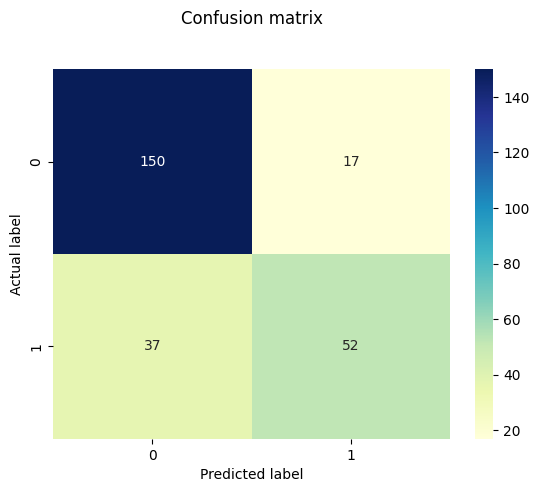

In [159]:
Y_pred = knn.predict(X_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(Y_test, Y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [162]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       167
           1       0.75      0.58      0.66        89

    accuracy                           0.79       256
   macro avg       0.78      0.74      0.75       256
weighted avg       0.79      0.79      0.78       256



# save model (pickle)

In [180]:
filename = 'UAS KNN.sav'
pickle.dump(df, open(filename, 'wb'))